# Exploratory Data Analysis of Amsterdam Airbnb's and inferring valuable info from them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
path='C:/Zcommon/trainee/project_1/amster_data1.csv'
df=pd.read_csv(path)

In [3]:
df.describe()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews,first_review_missing,last_review_missing,days_since_first_review,days_since_last_review,superhost_missing,availability_missing,has_license
count,5.850000e+03,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,...,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000
mean,6.619340e+17,92.124957,70.494530,0.245128,3.576068,5.839316,52.367100,4.889178,2.948889,1.232051,...,0.035897,1.196089,0.888547,0.111453,0.111453,1975.503590,824.899316,0.009744,0.021880,0.012821
std,5.775773e+17,20.886883,31.668365,0.452286,26.640167,57.667275,0.017203,0.034825,1.384013,0.538283,...,0.478368,2.398103,0.314719,0.314719,0.314719,1767.902407,1707.835898,0.098236,0.146305,0.112509
min,2.788600e+04,0.000000,0.000000,-1.000000,1.000000,1.000000,52.291220,4.755870,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,78.000000,0.000000,0.000000,0.000000
25%,3.073929e+07,100.000000,50.000000,0.000000,1.000000,1.000000,52.356070,4.865280,2.000000,1.000000,...,0.000000,0.210000,1.000000,0.000000,0.000000,545.000000,96.000000,0.000000,0.000000,0.000000
50%,7.932600e+17,100.000000,80.000000,0.000000,1.000000,1.000000,52.366024,4.887631,2.000000,1.000000,...,0.000000,0.510000,1.000000,0.000000,0.000000,1195.000000,138.000000,0.000000,0.000000,0.000000
75%,1.193829e+18,100.000000,100.000000,1.000000,2.000000,3.000000,52.376740,4.907377,4.000000,1.500000,...,0.000000,1.270000,1.000000,0.000000,0.000000,3141.750000,335.000000,0.000000,0.000000,0.000000
max,1.506287e+18,100.000000,100.000000,1.000000,957.000000,1655.000000,52.425120,5.028150,16.000000,17.000000,...,9.000000,99.420000,1.000000,1.000000,1.000000,5577.000000,5577.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5850 non-null   int64  
 1   last_scraped                                  5850 non-null   object 
 2   name                                          5850 non-null   object 
 3   host_since                                    5850 non-null   object 
 4   host_response_time                            5850 non-null   object 
 5   host_response_rate                            5850 non-null   float64
 6   host_acceptance_rate                          5850 non-null   float64
 7   host_is_superhost                             5850 non-null   int64  
 8   host_listings_count                           5850 non-null   float64
 9   host_total_listings_count                     5850 non-null   f

## Visualize the data 

### Starting with target variable price, checking distribution


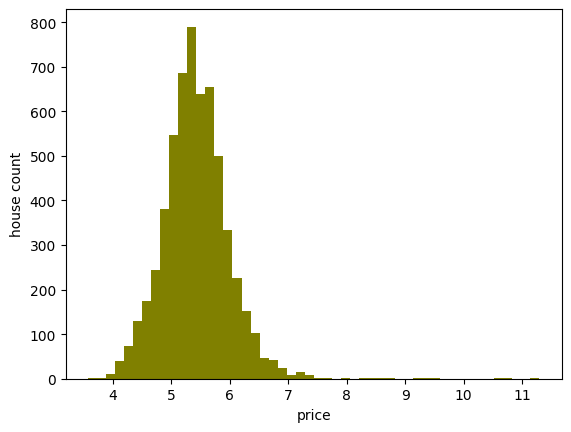

In [5]:
plt.hist(np.log1p(df['price']),bins=50,color='olive') 
plt.xlabel('price')
plt.ylabel('house count')
plt.show()

#### Using log1p to minimize the outlier's impact and because distribution is extremely skewed.

## Impact on price by room_type

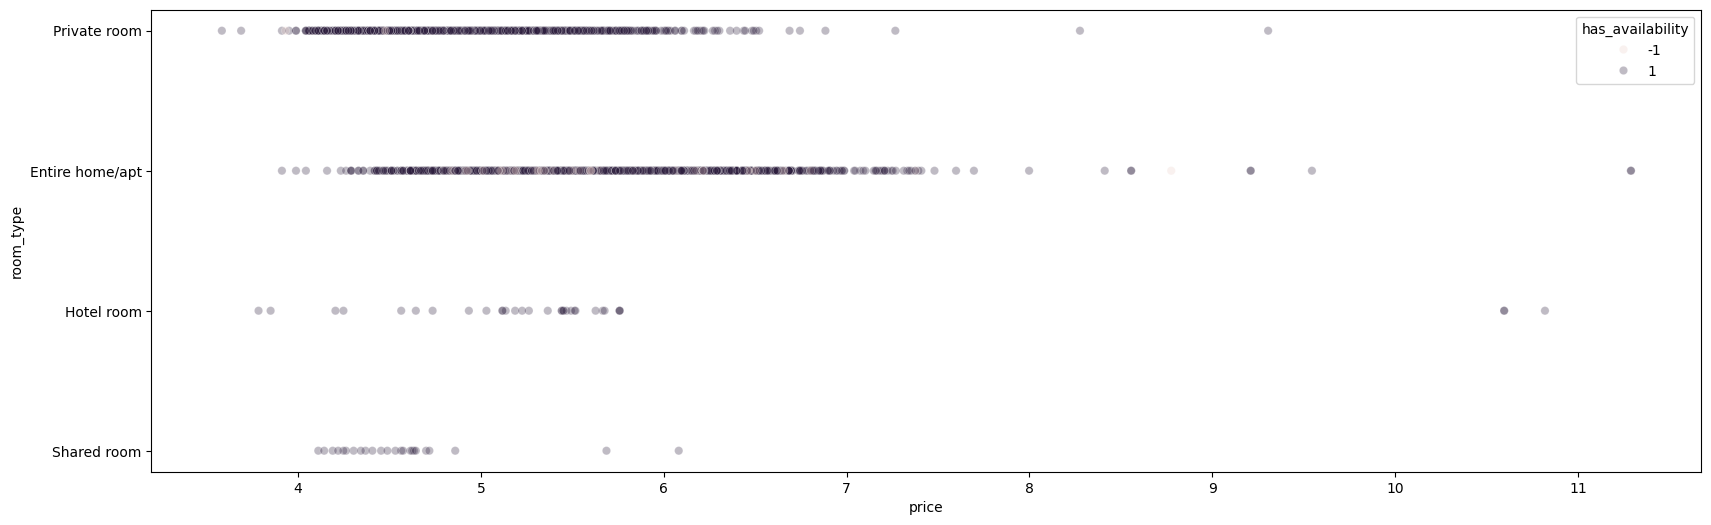

In [6]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=np.log1p(df['price']),y=df['room_type'],data=df,hue='has_availability',alpha=0.3)
plt.xlabel('price')
plt.ylabel('room_type')
plt.show()

## We have to use np.log1p because of the outrageous outliers :
* Amsterdam listings have a long-tailed price distribution:
* Most listings: $50–$300
* Some: $300–$1000
* Rare luxury/high-season listings: $5,000–$80,000

## Impact on price by number of bathrooms

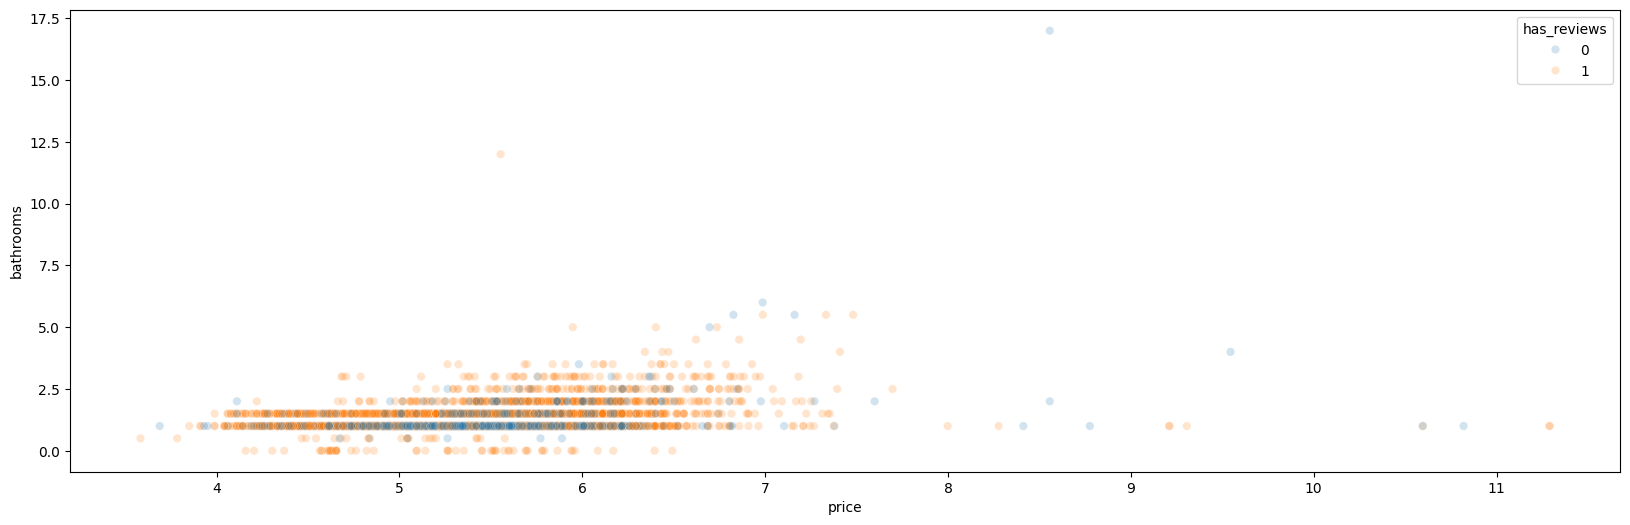

In [7]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=np.log1p(df['price']),y=df['bathrooms'],data=df,hue='has_reviews',alpha=0.2)
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.show()

### There seems to be minimal impact on price based on number of bathrooms, again its minimal but the impact is still there as we can see a very small number of values which seem to have more bathrooms and higher prices.

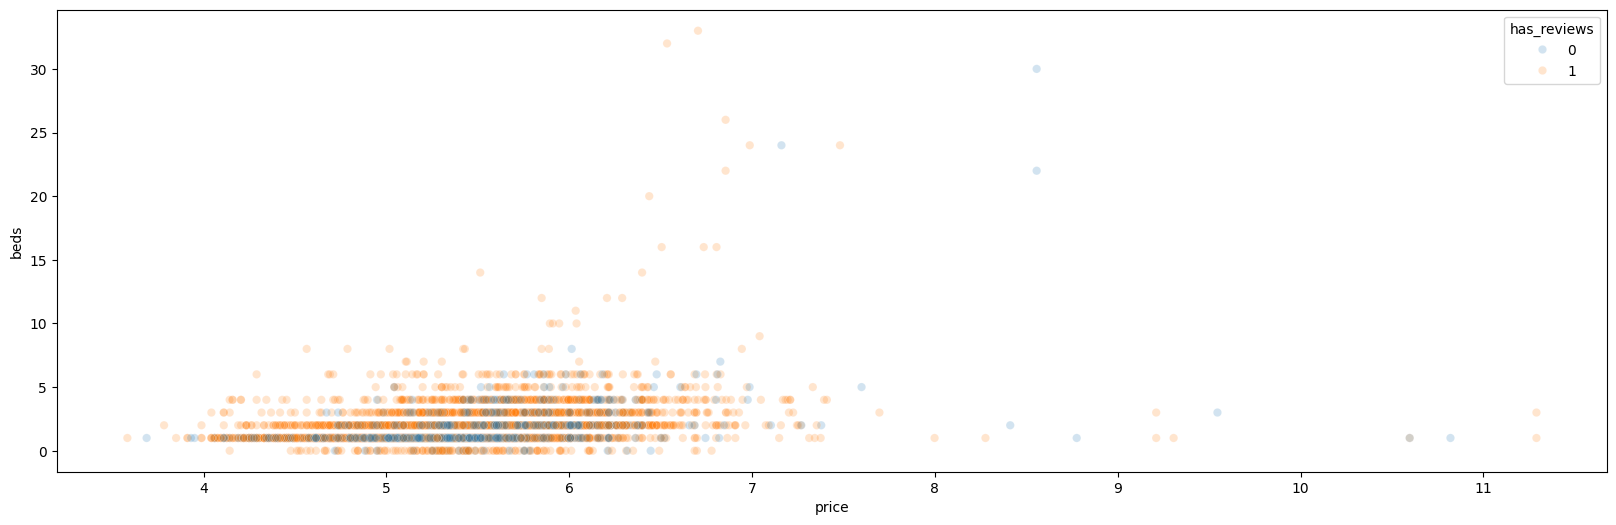

In [8]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=np.log1p(df['price']),y=df['beds'],data=df,hue='has_reviews',alpha=0.2)
plt.xlabel('price')
plt.ylabel('beds')
plt.show()

### It's clearly observable that as the number of beds increase the prices also increase, most values lie between ~0-~10 with 0 denoting maybe the shared beds like 0.5 values, though these seem funny there is actual meaning behind them, could be:
* they are shared.
* they hold multiple values like -> 1 bed + 1 hammock.
* they could be non-private mass hostels with numerous beds for people.


### Plot for all ability features.

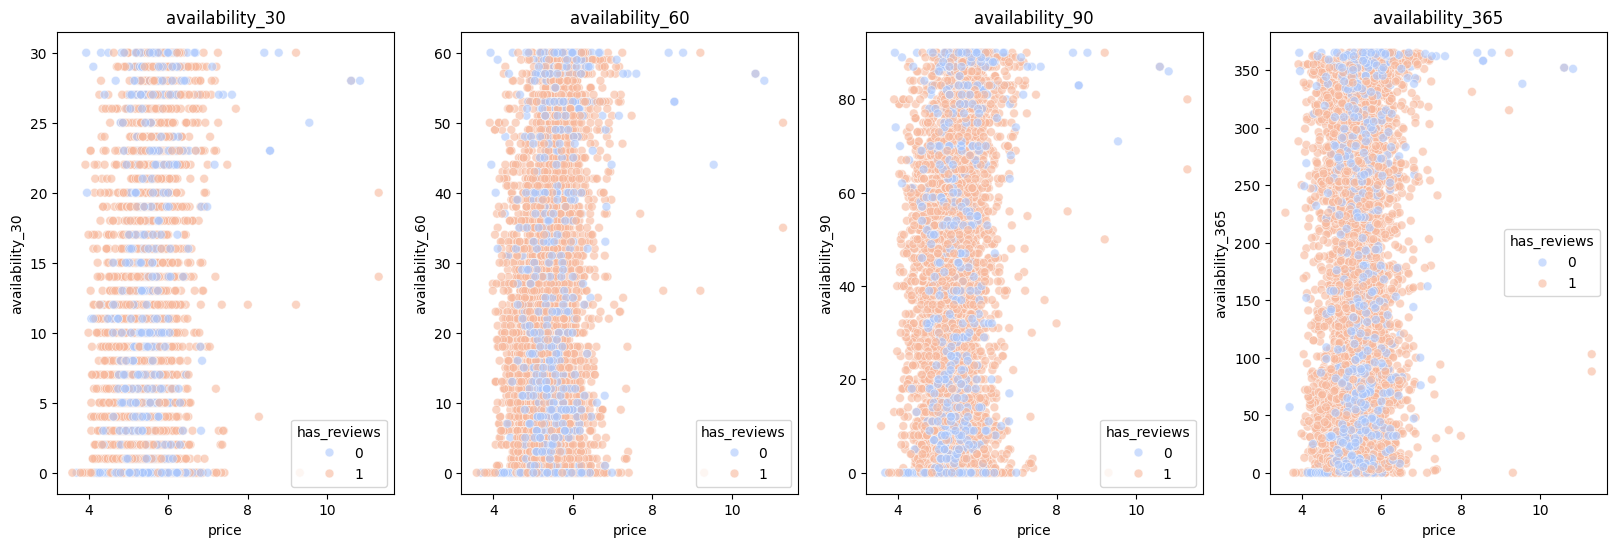

In [9]:
availability_cols = [ ### this one only was from AI
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365'
]

plt.figure(figsize=(20, 6))

for i, col in enumerate(availability_cols, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(
        x=np.log1p(df['price']),
        y=df[col],
        hue=df['has_reviews'],
        palette='coolwarm',
        alpha=0.6,
        s=40
    )
    plt.title(col)
    plt.xlabel('price')
    plt.ylabel(col)


### From this we infer that price increases in different manners with each of the availability features:
* availability_30: price's of different airbnb's are distributed consecutively on each day varied number of availability and there are a few  outliers that are prominent especially days 4, 12, 14, 20, 23, 25, 28, 30. The prices were high on these days for availability.
* availability_60, availability_90, availability_365 : The data is too cluttered for these three that we can almost hardly make out any outliers. Almost, there are still many prominent outliers denoting that on several days there is high availability for rooms at high prices.

### @Heatmap 1- host related features for affection on price

<Axes: >

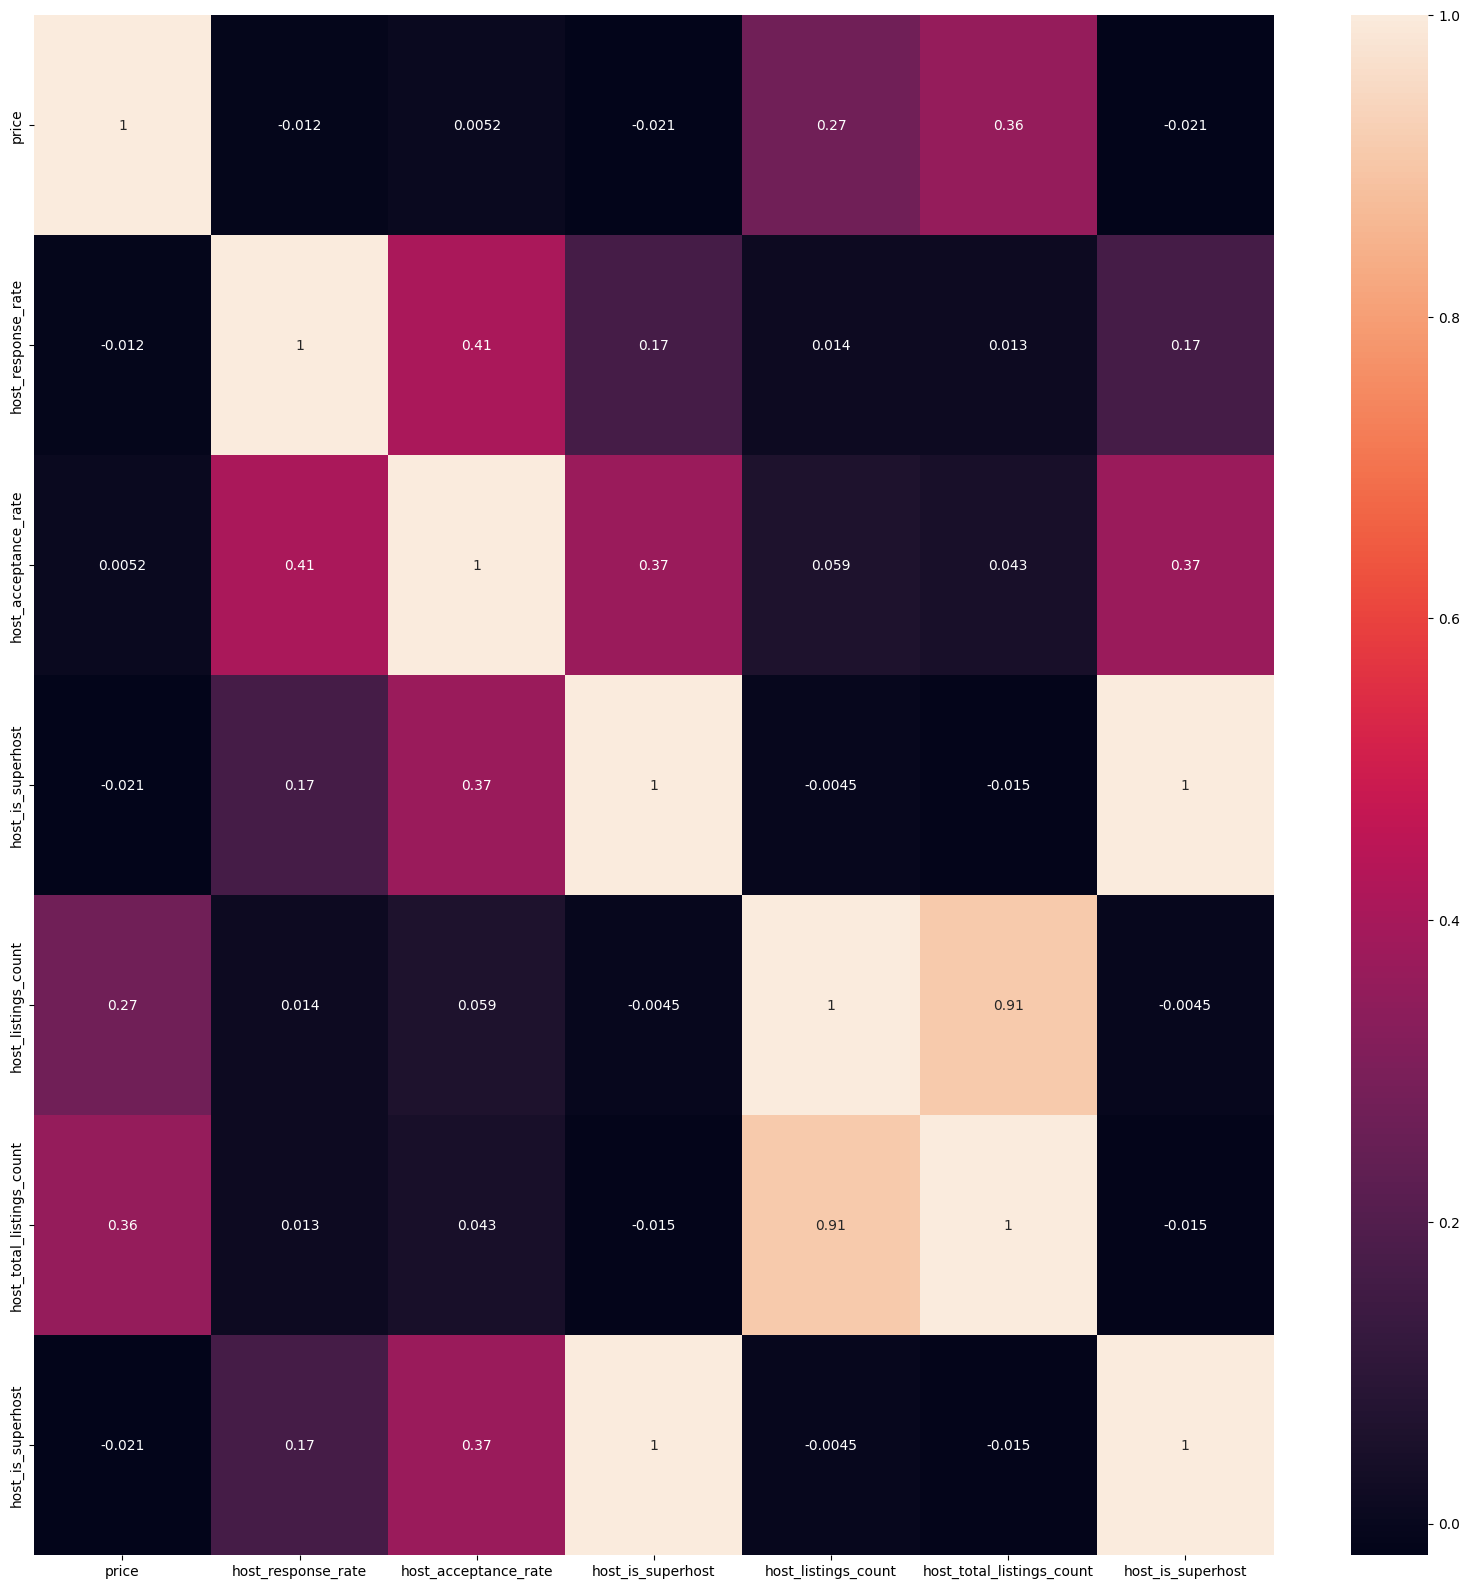

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['price','host_response_rate',                            
 'host_acceptance_rate'
 ,'host_is_superhost'  
 ,'host_listings_count'  
 ,'host_total_listings_count','host_is_superhost']].corr(numeric_only=True),annot=True)

### This is good, we can clearly see that host_listings_count and host_total_listings_count are affectig price by 0.27 and 0.36 % repectively, telling us that these are important factors for price prediction. Though not by much, but it is productive.

## @Heatmap 2- Everything related to reviews helping with price prediction

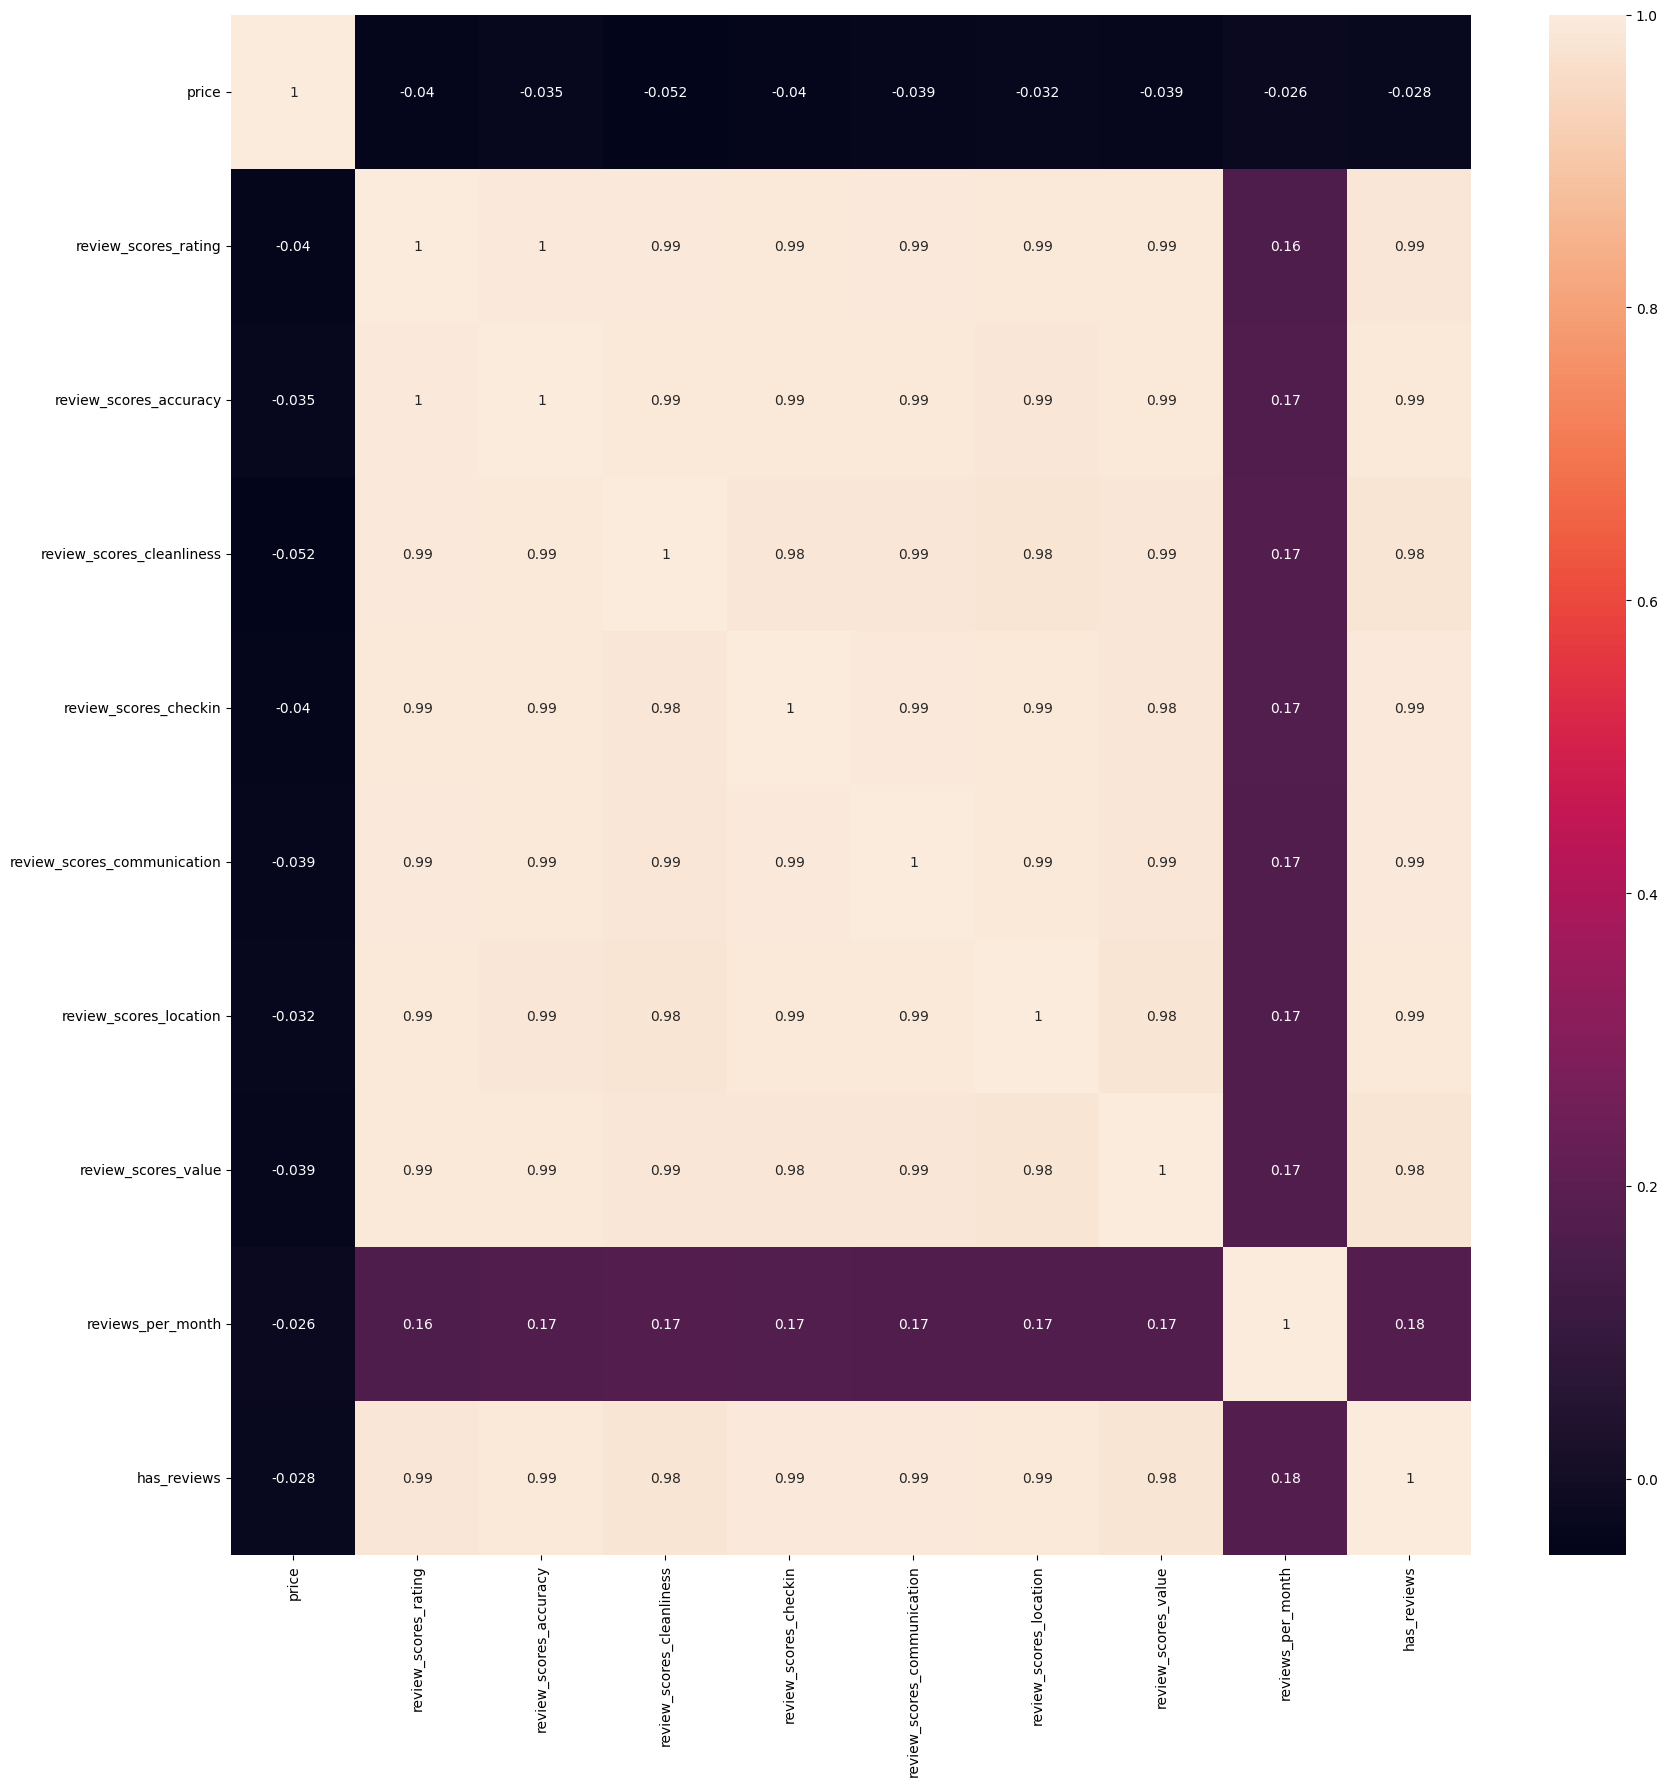

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['price','review_scores_rating',                         
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value','reviews_per_month','has_reviews']].corr(numeric_only=True),annot=True)
plt.show()

### Review related everything is of almost no use as the relational values are in negative.

## @Heatmap 3-min/max nights and everything related to them.

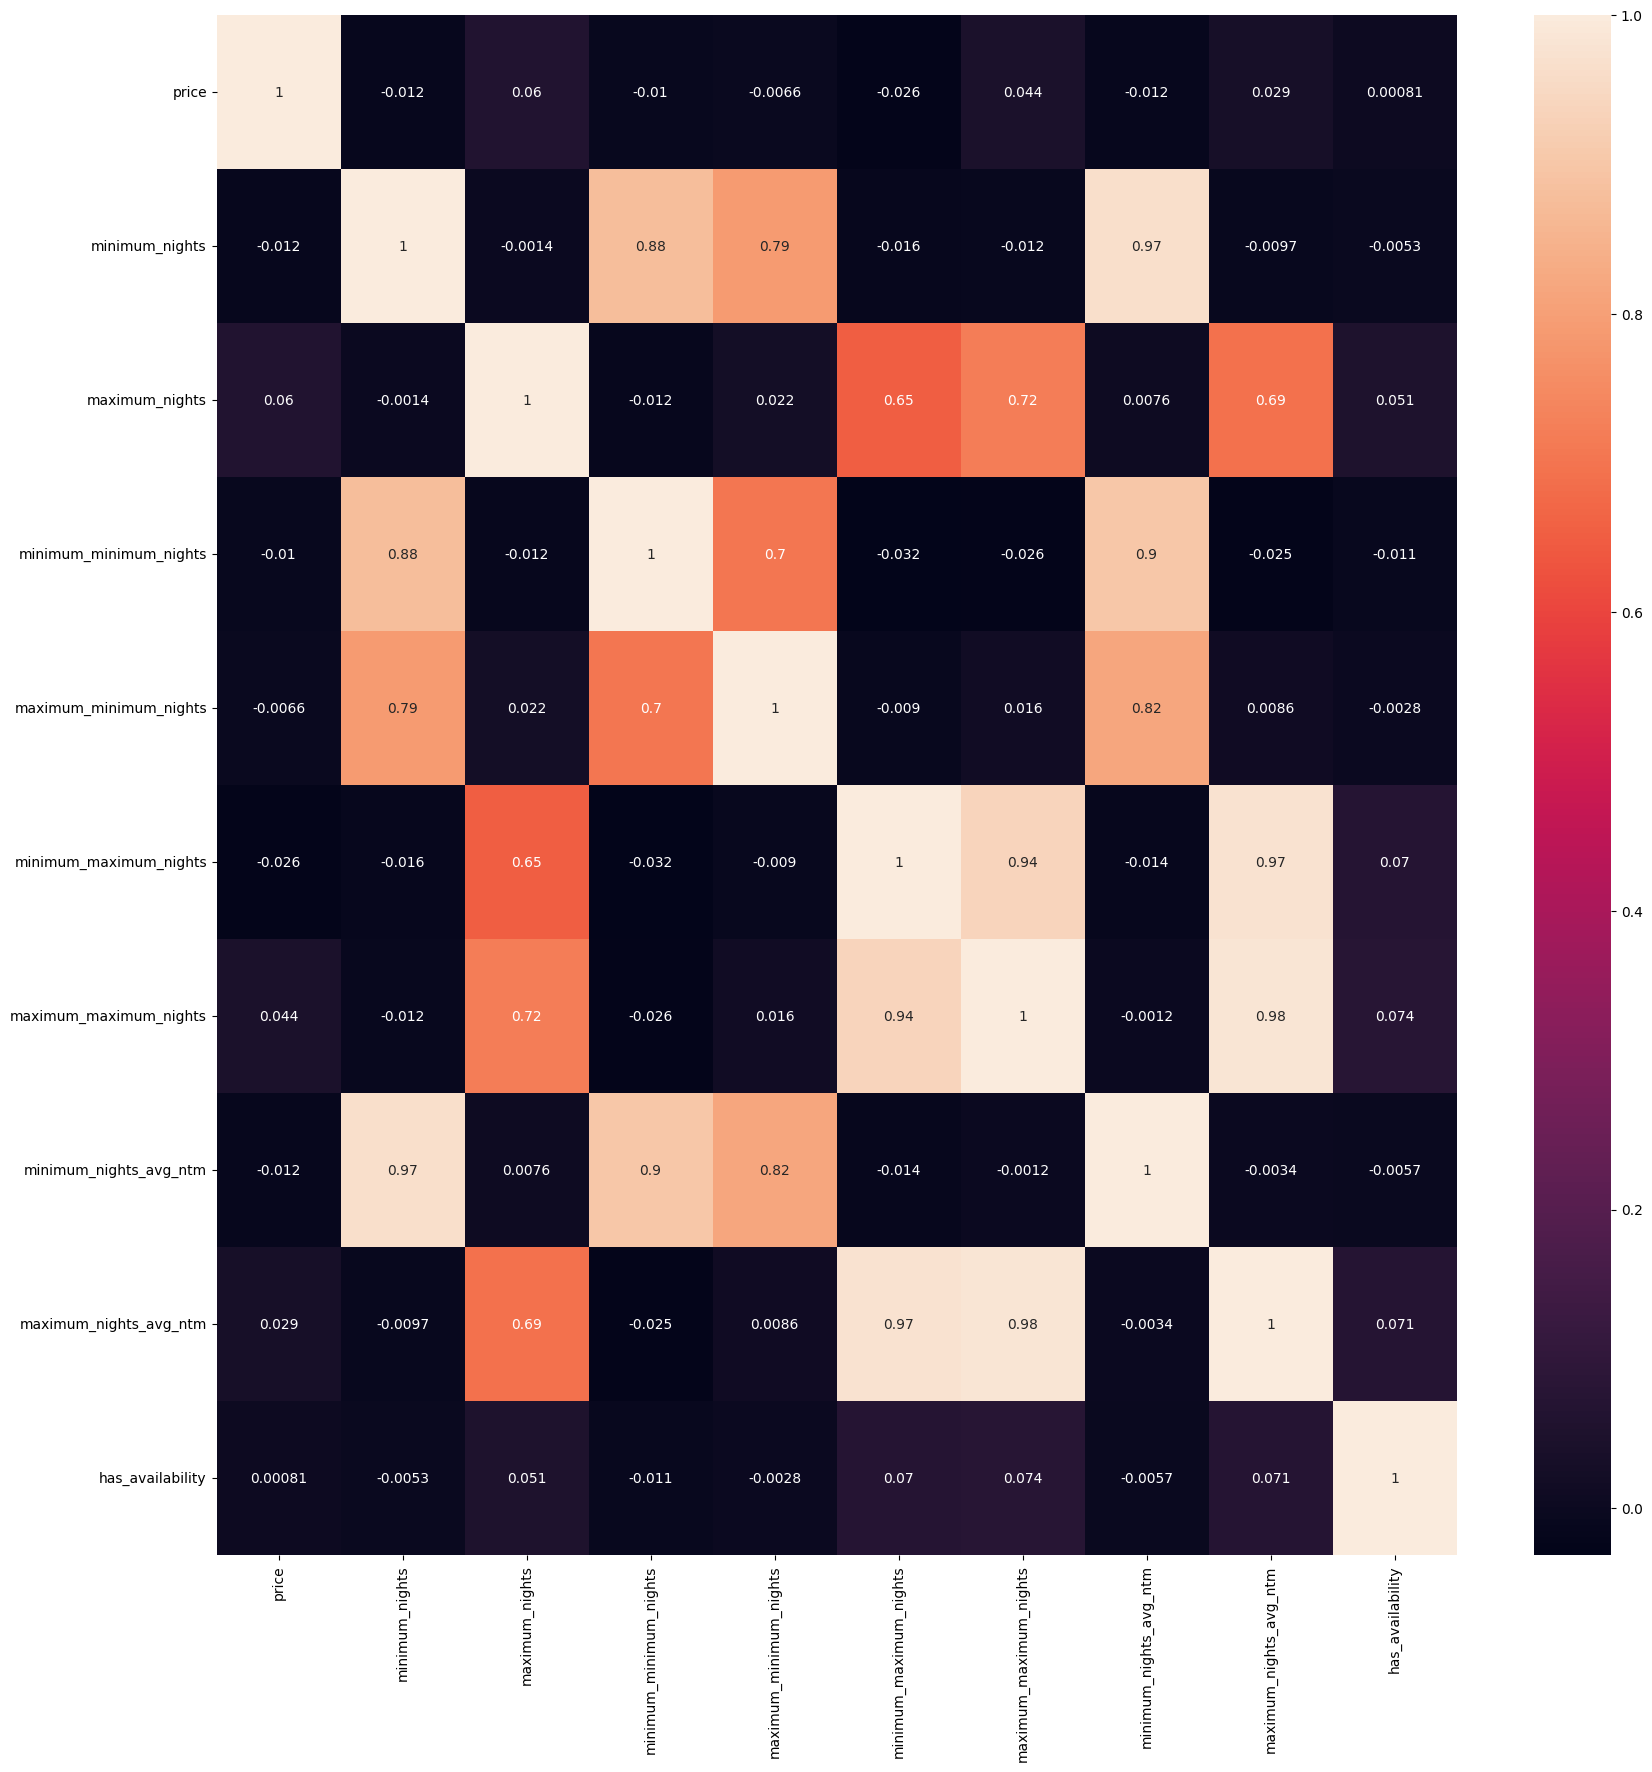

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['price','minimum_nights','maximum_nights'                
 ,'minimum_minimum_nights'       
 ,'maximum_minimum_nights'        
 ,'minimum_maximum_nights'        
 ,'maximum_maximum_nights'        
 ,'minimum_nights_avg_ntm'        
 ,'maximum_nights_avg_ntm'        
 ,'has_availability']].corr(numeric_only=True),annot=True)
plt.show()

### This tells us that these features are of little to no importance when it comes to affecting prices.

## @Heatmap 4- All major features affecting price.

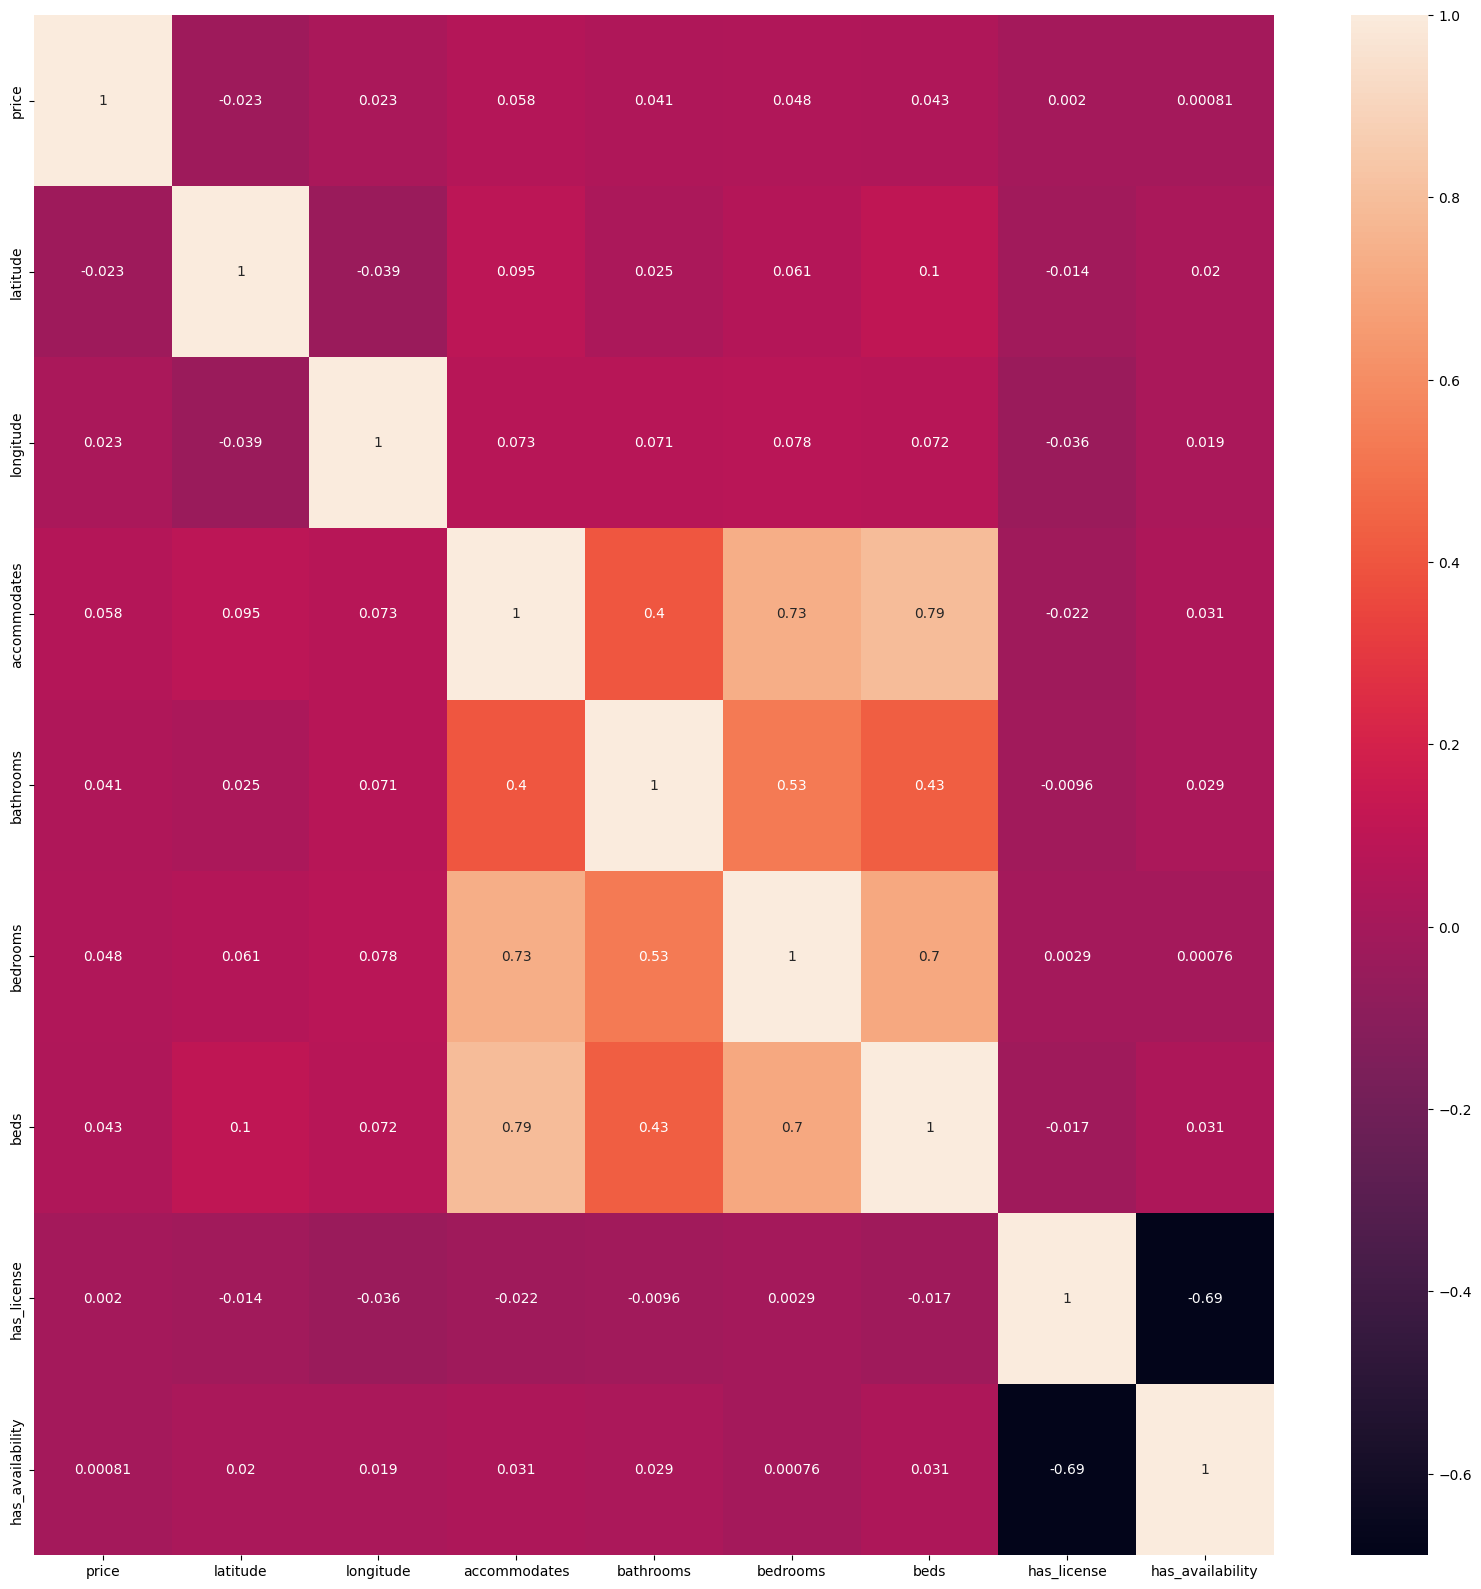

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['price','latitude'                                      
,'longitude'
,'property_type'
,'room_type'
,'accommodates'
,'bathrooms'
,'bathrooms_text'
,'bedrooms'
,'beds'
,'amenities','has_license','has_availability','instant_bookable']].corr(numeric_only=True),annot=True)
plt.show()

## @Heatmap 5- To root out featires that were calculated using price 

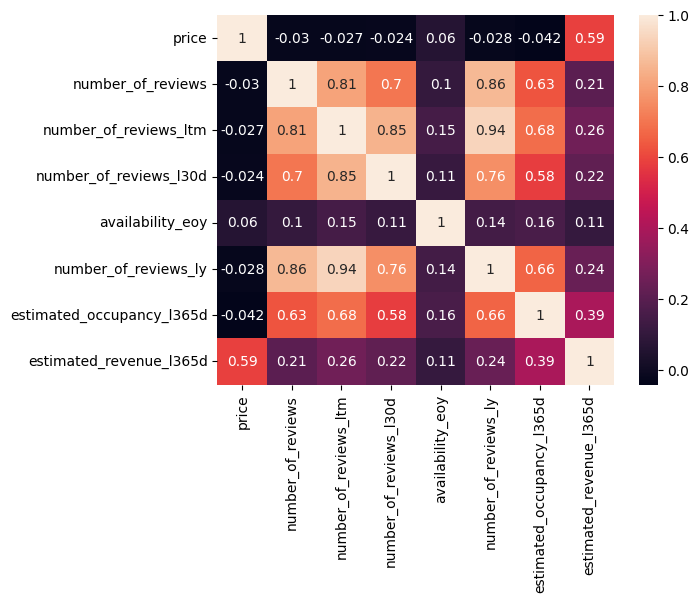

In [14]:
plt.Figure(figsize=(20,20))
sns.heatmap(df[['price','number_of_reviews'                             
,'number_of_reviews_ltm'  
,'number_of_reviews_l30d'  
,'availability_eoy'  
,'number_of_reviews_ly'  
,'estimated_occupancy_l365d'  
,'estimated_revenue_l365d']].corr(numeric_only=True),annot=True)
plt.show()

### The estimated_revenue_l365 is calculated using the price and keeping it will only result in data leakage and model will overfit resulting in all progress to be lost. So, everything that contains future data or even tries to predict it will affect the model in a very bad way.

In [18]:
df=df.drop(columns=['estimated_revenue_l365d','estimated_occupancy_l365d','availability_eoy'])

## Overall Correlation of the features.

In [19]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(numeric_only=True),annot=False)
plt.title('Overall Correlation.')
plt.show()

## We have learned a lot about the relationships between many variables and also removed the ones which would have caused model overfitting, now we move to encodind and mlpreprocessing steps.

In [20]:
df.to_csv('dataset_part2_amster.csv',index=False)

# END